In [87]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [88]:
sns.set_theme() #função para melhorar o visual dos graficos

# Grid Aproximation

### 2.6

In [89]:
def posterior_grid_aproximation(length, size, x) :
    p_grid = np.linspace(0, 1, length) #define o grid - quantas divisoes serao feitas no eixo x
    prior = np.repeat(1, length) #priori nao informaitiva
    likelihood = stats.binom.pmf(x, size, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    #posterior = unstd_posterior / unstd_posterior.sum() #usando o sum do numpy (método sum do numpy array)    
    
    return p_grid,posterior
    #o print só mostra visualmente no notebook. O return grava o dado para ser usado em outra parte do código

In [90]:
posterior_grid_aproximation(20,9,6) #retorna o grid (eixo x) e a posteriori (eixo y)

(array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 array([0.00000000e+00, 7.98983711e-07, 4.30771684e-05, 4.09079660e-04,
        1.89388732e-03, 5.87387288e-03, 1.40429377e-02, 2.78517436e-02,
        4.78011547e-02, 7.28073907e-02, 9.98729639e-02, 1.24264330e-01,
        1.40314323e-01, 1.42834880e-01, 1.28943257e-01, 9.98729639e-02,
        6.20588995e-02, 2.64547661e-02, 4.65967300e-03, 0.00000000e+00]))

##### Como a função retorna um array de duas dimensões, dá pra atribuir duas variáveis diferentes à função

In [91]:
grid, posterior = posterior_grid_aproximation(20,9,6)

In [92]:
print(grid)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


Plotando o gráfico

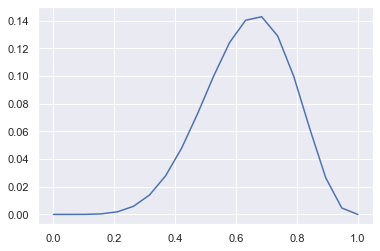

In [93]:
plt.plot(grid, posterior)

c:\Users\noele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

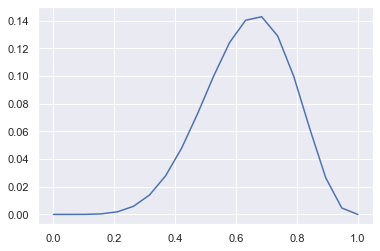

In [94]:
sns.lineplot(grid,posterior)

In [95]:
df = pd.DataFrame()
df['grid'] = grid
df['posterior'] = posterior

In [96]:
df

,grid,posterior
0,0.000000,0.000000e+00
1,0.052632,7.989837e-07
2,0.105263,4.307717e-05
3,0.157895,4.090797e-04
4,0.210526,1.893887e-03
5,0.263158,5.873873e-03
6,0.315789,1.404294e-02
7,0.368421,2.785174e-02
8,0.421053,4.780115e-02
9,0.473684,7.280739e-02


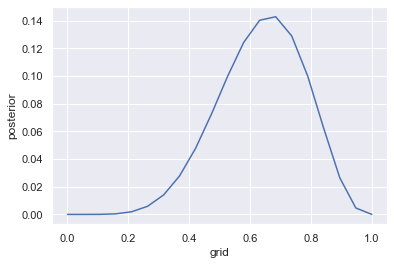

In [97]:
# para evitar o warning:
sns.lineplot(data = df, x = 'grid', y = 'posterior')
plt.show()

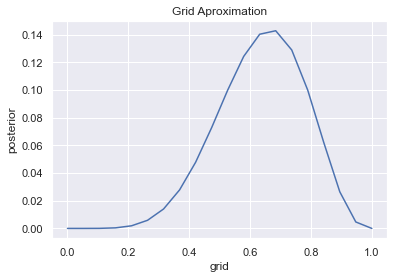

In [98]:
sns.lineplot(data = df, x = 'grid', y = 'posterior').set(title = 'Grid Aproximation')
plt.show()

# Exercícios

### 2M1

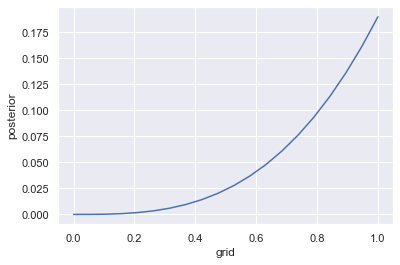

In [99]:
# (W,W,W)
grid, posterior = posterior_grid_aproximation(20,3,3)
df = pd.DataFrame()
df['grid'] = grid
df['posterior'] = posterior
sns.lineplot(data = df, x = 'grid', y = 'posterior')
plt.show()


In [100]:
df_2m1 = pd.DataFrame()
df_2m1['water'] = [1,1,1]+[1,1,1,0]+[0,1,1,0,1,1,1]
# se fosse no numpy, ele iria somar cada elemento de acordo com a ordem. No caso de lista do Python, ele concatena.
df_2m1['set'] = [0,0,0]+[1,1,1,1]+[2,2,2,2,2,2,2]
df_2m1


,water,set
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,1
7,0,2
8,1,2
9,1,2


In [101]:
condicao = df_2m1['set'] == 0
df_2m1[condicao]

,water,set
0,1,0
1,1,0
2,1,0


In [102]:
df_2m1[(df_2m1['set'] == 1) & (df_2m1['water'] == 1)]

,water,set
3,1,1
4,1,1
5,1,1


In [103]:
df_2m1[df_2m1['set'] == 0]['water']

0    1
1    1
2    1
Name: water, dtype: int64

In [126]:
type(df_2m1)

pandas.core.frame.DataFrame

In [125]:
df_2m1

,water,set
0,1,0
1,1,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,1
7,0,2
8,1,2
9,1,2


In [127]:
type(df_2m1['set'])

pandas.core.series.Series

In [130]:
type(df_2m1['set'].to_numpy())

numpy.ndarray

In [142]:
df_2m1['set'].to_numpy().astype(float)

array([0., 0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2.])

In [143]:
df_2m1['set'].to_numpy()

array([0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [157]:
#retornando a primeira linha de todas as coluna
df_2m1.iloc[0,:]

water    1
set      0
Name: 0, dtype: int64

In [158]:
#retorna todas as primeiras 4 linhas e todas as coluna
df_2m1.iloc[:4,:]

,water,set
0,1,0
1,1,0
2,1,0
3,1,1


In [162]:
#todos os numeros da serie ate a quinta posição
df_2m1['water'][:5]

0    1
1    1
2    1
3    1
4    1
Name: water, dtype: int64

In [164]:
df_2m1['outra'] = df_2m1['set'][:10]
df_2m1

,water,set,nova,outra
0,1,0,1,0.0
1,1,0,1,0.0
2,1,0,1,0.0
3,1,1,2,1.0
4,1,1,2,1.0
5,1,1,2,1.0
6,0,1,1,1.0
7,0,2,2,2.0
8,1,2,3,2.0
9,1,2,3,2.0


In [165]:
df_2m1['outra'] = [1,2,3,4,5,6,7]
df_2m1

ValueError: Length of values (7) does not match length of index (14)

In [160]:
#criando uma nova coluna baseado em outras existentes
df_2m1['nova'] = df_2m1['set'] + df_2m1['water']
df_2m1

,water,set,nova
0,1,0,1
1,1,0,1
2,1,0,1
3,1,1,2
4,1,1,2
5,1,1,2
6,0,1,1
7,0,2,2
8,1,2,3
9,1,2,3


In [132]:
lista = [0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

In [134]:
type(lista)

list

In [137]:
df_2m1[df_2m1['set'] < 1]

,water,set
0,1,0
1,1,0
2,1,0


In [104]:
df_2m1[df_2m1['set'] == 0]['water'].sum()

3

In [105]:
len(df_2m1[df_2m1['set'] == 0]['water'])

3

In [106]:
df_2m1['set'].unique()

array([0, 1, 2], dtype=int64)

In [107]:
for i in [1,2,3] :
    print(i)

1
2
3


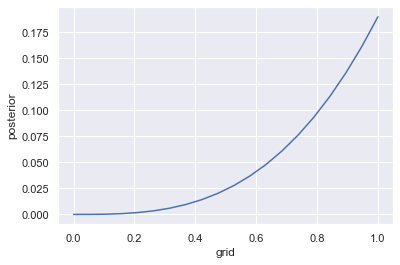

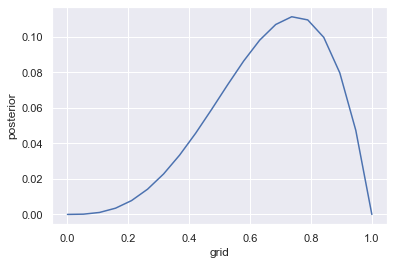

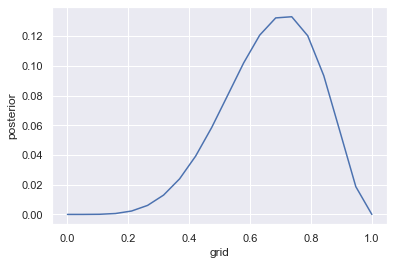

In [108]:
for i in df_2m1['set'].unique() :
    x = df_2m1[df_2m1['set'] == i]['water'].sum()
    size = len(df_2m1[df_2m1['set'] == i]['water'])
    
    grid, posterior = posterior_grid_aproximation(20,size,x)
    df = pd.DataFrame()
    df['grid'] = grid
    df['posterior'] = posterior
    sns.lineplot(data = df, x = 'grid', y = 'posterior')
    plt.show()

#### 2M2

In [111]:
def posterior_grid_aproximation2(length, size, x) :
    p_grid = np.linspace(0, 1, length)
    prior = (np.linspace(0, 1, length) >= 0.5).astype(int)
    likelihood = stats.binom.pmf(x, size, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    #posterior = unstd_posterior / unstd_posterior.sum() #usando o sum do numpy (método sum do numpy array)    
    
    return p_grid,posterior
    #o print só mostra visualmente no notebook. O return grava o dado para ser usado em outra parte do código

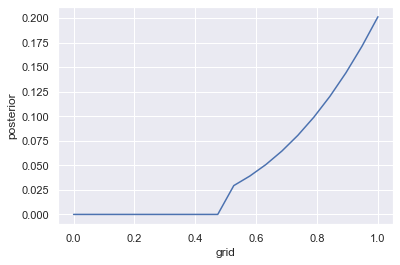

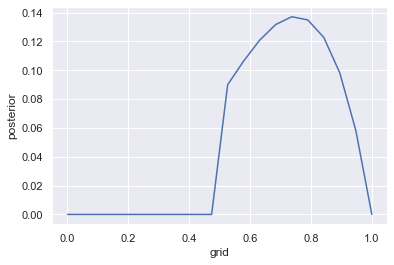

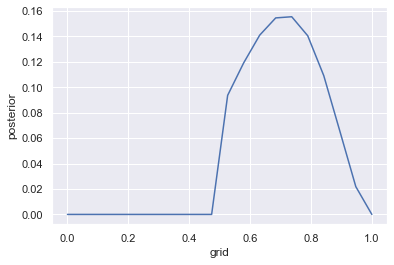

In [112]:
for i in df_2m1['set'].unique() :
    x = df_2m1[df_2m1['set'] == i]['water'].sum()
    size = len(df_2m1[df_2m1['set'] == i]['water'])
    
    grid, posterior = posterior_grid_aproximation2(20,size,x)
    df = pd.DataFrame()
    df['grid'] = grid
    df['posterior'] = posterior
    sns.lineplot(data = df, x = 'grid', y = 'posterior')
    plt.show()

#### 2M3

P(L|mars) = 1
P(mars) = 0.5

P(W|earth) = 0.7
P(L|earth) = 0.3
P(earth) = 0.5

P(L|earth) = P(earth|L) x P(L) / P(earth)
0.3 = 0.23 x P(L) / 0.5
P(L) = 0.65

P(earth|L) = 0.23
P(earth|L) = P(L|earth) x P(earth) / P(L)
P(earth|L) = 0.3 x 0.5 / 0.65 = 0.2308

#### 2M4

3 cards w/ 2 sides (black or white)

card 1 = 2 black sides
card 2 = black and white side
card 3 = 2 white sides

Possibilidades:
P(black1|black2)
P(black2|black1)
P(black1|white)

opções corretas:
P(black1|black2)
P(black2|black1)

Logo, P(black|black) = 2/3


#### 2M5

P(black1|black2)
P(black2|black1)
P(black|white)
P(white|black)
P(white1|white2)
P(white2|white1)
P(black3|black4)
P(black4|black3)

Possibilidades:
P(black1|black2)
P(black2|black1)
P(black|white)
P(black3|black4)
P(black4|black3)

opções corretas:
P(black1|black2)
P(black2|black1)
P(black3|black4)
P(black4|black3)

Logo, P(black|black) = 4/5

#### 2M6

P(black1|black2)
P(black2|black1)
P(black|white)
P(black|white)
P(white|black)
P(white1|white2)
P(white2|white1)
P(white1|white2)
P(white2|white1)
P(white1|white2)
P(white2|white1)

Possibilidades:
P(black1|black2)
P(black2|black1)
P(black|white)
P(black|white)

opções corretas:
P(black1|black2)
P(black2|black1)

Logo, P(black|black) = 2/4 = 0.5

#### 2M7

P(black1|black2)
P(black2|black1)
P(black|white)
P(white|black)
P(white1|white2)
P(white2|white1)
P(black3|black4)
P(black4|black3)

Possibilidades card1:
P(black1|black2) & P(white|black)
P(black1|black2) & P(white1|white2)
P(black1|black2) & P(white2|white1)
P(black2|black1) & P(white|black)
P(black2|black1) & P(white1|white2)
P(black2|black1) & P(white2|white1)
P(black|white) & P(white|black)
P(black|white) & P(white1|white2)
P(black|white) & P(white2|white1)
P(black3|black4) & P(white|black)
P(black3|black4) & P(white1|white2)
P(black3|black4) & P(white2|white1)
P(black4|black3) & P(white|black)
P(black4|black3) & P(white1|white2)
P(black4|black3) & P(white2|white1)

opções corretas card1:
P(black1|black2) & P(white|black)
P(black1|black2) & P(white1|white2)
P(black1|black2) & P(white2|white1)
P(black2|black1) & P(white|black)
P(black2|black1) & P(white1|white2)
P(black2|black1) & P(white2|white1)
P(black3|black4) & P(white|black)
P(black3|black4) & P(white1|white2)
P(black3|black4) & P(white2|white1)
P(black4|black3) & P(white|black)
P(black4|black3) & P(white1|white2)
P(black4|black3) & P(white2|white1)

--

Logo, P(black|black) = 12/16 = 0.75

#### 2H1

pandaA : P(T1|A) = 0.1 ; P(S1|A) = 0.9 
pandaB : P(T1|B) = 0.2 ; P(S1|B) = 0.8 
P(A) = P(B) = 0.5

Probabilidade de ter gêmeos na segunda gravidez dado que teve gêmeos na primeira gravidez. Sendo que não sabemos qual é a especie.
P(T2 | T1) = ?

Usando a regra do produto:
P(A ∩ B) = P(A|B) * P(B)
P(A|B) = P(A ∩ B) / P(B)

P(T2 | T1) = P(T2 ∩ T1) / P(T1)

Como não sabemos se se trata do Panda A ou B,
P(T2 ∩ T1) = P(T2 ∩ T1|A) * P(A) + P(T2 ∩ T1|B) * P(B)
P(T2 ∩ T1) = P(T2|T1 ∩ A) * P(T1|A) * P(A) + P(T2|T1 ∩ B) * P(T1|B) * P(B)

Como T1 e T2 são eventos independentes,
P(T2 ∩ T1) = P(T2|A) * P(T1|A) * P(A) + P(T2|B) * P(T1|B) * P(B)
P(T2 ∩ T1) = 0.1 * 0.1 * 0.5 + 0.2 * 0.2 * 0.5
P(T2 ∩ T1) = 0.005 + 0.02
P(T2 ∩ T1) = 0.025

P(T1) = P(T1|A) * P(A) + P(T1|B) * P(B)
P(T1) = 0.1 * 0.5 + 0.2 * 0.5
P(T1) = 0.05 + 0.1 = 0.15

P(T2 | T1) = P(T2 ∩ T1) / P(T1)
P(T2 | T1) = 0.025 / 0.15 = 0.167

#### 2H2

P(A|T2) = P(T2|A) * P(A) / P(T2)
P(A|T2) = 0.1 * 0.5 / 0.15
P(A|T2) = 0.33

P(T2) = P(T2|A) * P(A) + P(T2|B) * P(B)
P(T2) = 0.1 * 0.5 + 0.2 * 0.5
P(T2) = 0.05 + 0.1 = 0.15

#### 2H3

P(A|S2 ∩ T1) = P(S2 ∩ T1| A) * P(A) / P(S2 ∩ T1)

se S2 ⊥ T1 ⇒ P(S2 ∩ T1|A) = P(S2|A) * P(T1|A)

P(A|S2 ∩ T1) = P(S2|A) * P(T1|A) * P(A) / P(S2 ∩ T1|A) * P(A) + P(S2 ∩ T1|B) * P(B)
P(A|S2 ∩ T1) = P(S2|A) * P(T1|A) * P(A) / P(S2|A) * P(T1|A) * P(A) + P(S2|B) * P(T1|B) * P(B)

P(A|S2 ∩ T1) = (0.9 * 0.1 * 0.5) / (0.9 * 0.1 * 0.5 + 0.8 * 0.2 * 0.5)
P(A|S2 ∩ T1) = 0.045 / (0.045 + 0.08) = 0.36

#### 2H4